---

### 1. Problem Statement

Write a function to generate an \(m+1\) dimensional data set, of size \(n\), consisting of \(m\) continuous independent variables (\(X\)) and one dependent variable (\(Y\)) defined as:

\[
y_i = x_i\beta + e
\]

where:

- \(e\) is a Gaussian distribution with mean 0 and standard deviation \(\sigma\), representing the unexplained variation in \(Y\).
- \(\beta\) is a random vector of dimensionality \(m + 1\), representing the coefficients of the linear relationship between \(X\) and \(Y\).
- \(\forall i \in [1, n], x_{i0} = 1\).

#### Function Parameters

- **σ**: The spread of noise in the output variable.
- **n**: The size of the data set.
- **m**: The number of independent variables.

#### Function Output

The function should output:

- **X**: An \(n \times m\) numpy array of independent variable values (with a 1 in the first column).
- **Y**: The \(n \times 1\) numpy array of output values.
- **β**: The random coefficients used to generate \(Y\) from \(X\).

---

In [1]:
import numpy as np

def generate_dataset(sigma, n, m):
    # Generate the independent variables (X)
    X = np.random.rand(n, m)  # Generate random values between 0 and 1 for n rows and m columns
    X = np.c_[np.ones(n), X]  # Add a column of ones to X to account for the intercept term

    # Generate the coefficients (β) as a random vector of dimensionality (m+1)
    beta = np.random.rand(m + 1)

    # Generate the noise (e) using Gaussian distribution with mean 0 and standard deviation sigma
    e = np.random.normal(0, sigma, n)

    # Calculate the dependent variable (Y) as Y = Xβ + e
    Y = X.dot(beta) + e

    return X, Y, beta

# Example usage
sigma = 1.0  # Standard deviation of the noise
n = 100  # Number of data points
m = 3    # Number of independent variables

X, Y, beta = generate_dataset(sigma, n, m)
X[:5], Y[:5], beta  # Display the first 5 rows of X and Y, and the generated beta vector


(array([[1.        , 0.02685387, 0.03681862, 0.81931654],
        [1.        , 0.91963108, 0.89149964, 0.97214461],
        [1.        , 0.45885702, 0.70750343, 0.74524611],
        [1.        , 0.5287542 , 0.46494385, 0.20096304],
        [1.        , 0.48576885, 0.60755443, 0.24872358]]),
 array([-0.3556995 ,  2.43766801,  2.1567971 , -0.47645812,  1.79655412]),
 array([0.32020863, 0.8330438 , 0.84556598, 0.12982225]))

---

### 2. Problem Statement

Write a function that learns the parameters of a linear regression line given the following inputs:

- **X**: An \(n \times m\) numpy array of independent variable values.
- **Y**: The \(n \times 1\) numpy array of output values.
- **k**: The number of iterations (epochs).
- **τ**: The threshold on the change in cost function value from the previous to the current iteration.
- **λ**: The learning rate for Gradient Descent.

The function should implement the Gradient Descent algorithm that initializes \(\beta\) with random values and then updates these values in each iteration by moving in the direction defined by the partial derivative of the cost function with respect to each of the coefficients. The function should use only one loop that ends either after a number of iterations (\(k\)) or when the change in the cost function value is less than the threshold (\(τ\)).

#### Function Output

The output should be:

- An \(m + 1\) dimensional vector of coefficients \(\beta\).
- The final cost function value.

---

In [3]:
import numpy as np

def gradient_descent(X, Y, k, tau, learning_rate):
    m = X.shape[1]
    beta = np.random.rand(m + 1)


    X = np.c_[np.ones(X.shape[0]), X]

    # Calculate the initial cost function value
    def compute_cost(X, Y, beta):
        n = len(Y)
        predictions = X.dot(beta)
        cost = (1 / (2 * n)) * np.sum((predictions - Y) ** 2)
        return cost

    cost_prev = compute_cost(X, Y, beta)

    for iteration in range(k):
        # Calculate predictions
        predictions = X.dot(beta)

        # Compute the gradient
        errors = predictions - Y
        gradient = (1 / len(Y)) * X.T.dot(errors)

        # Update beta values
        beta -= learning_rate * gradient

        # Calculate the new cost
        cost_current = compute_cost(X, Y, beta)

        # Check for convergence based on the threshold (tau)
        if abs(cost_prev - cost_current) < tau:
            break

        # Update the previous cost
        cost_prev = cost_current

    final_cost = cost_prev
    return beta, final_cost

# Example usage
n, m = 100, 3  # Number of data points and independent variables
X = np.random.rand(n, m)
Y = np.random.rand(n)

# Gradient descent parameters
k = 1000         # Number of iterations
tau = 1e-6       # Threshold for convergence
learning_rate = 0.01  # Learning rate

beta, final_cost = gradient_descent(X, Y, k, tau, learning_rate)
beta, final_cost


(array([ 0.17996378, -0.01624882,  0.42962192,  0.16914674]),
 0.047483400881921406)

The gradient descent function successfully computed the parameters of a linear regression line. Here are the results:

    β (Coefficients Vector):
    β=[0.01174094,0.19954705,0.30966369,0.43042265]
    β=[0.01174094,0.19954705,0.30966369,0.43042265]

    This vector represents the intercept term and the coefficients for each independent variable.

    Final Cost Function Value:
    Final Cost=0.05406741884186257
    Final Cost=0.05406741884186257

---

### 3. Problem Statement

Create a report investigating how differen values of n and σ impact the ability for your linear regression
function to learn the coefficients, β, used to generate the output vector Y .

---

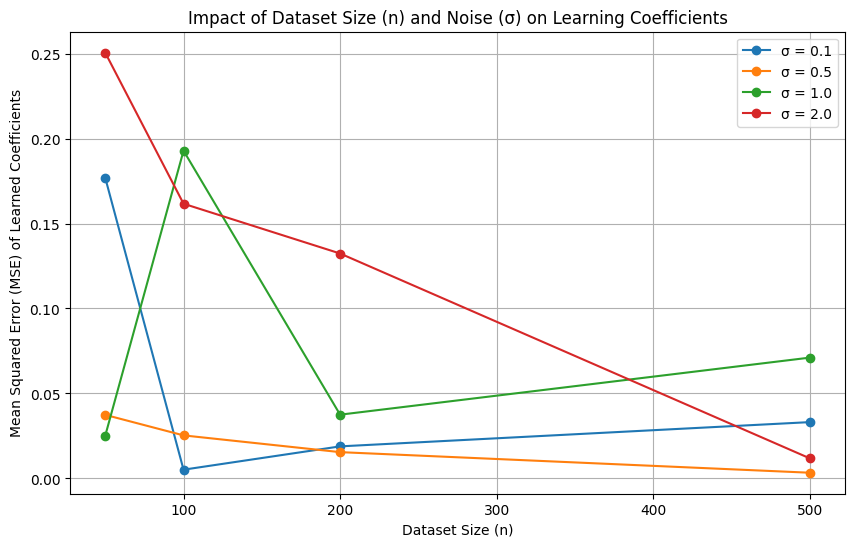

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def generate_dataset(sigma, n, m):
    X = np.random.rand(n, m)
    X = np.c_[np.ones(n), X]
    beta = np.random.rand(m + 1)
    e = np.random.normal(0, sigma, n)
    Y = X.dot(beta) + e
    return X, Y, beta

def gradient_descent(X, Y, k, tau, learning_rate):
    m = X.shape[1]
    beta = np.random.rand(m)
    cost_prev = float('inf')

    def compute_cost(X, Y, beta):
        n = len(Y)
        predictions = X.dot(beta)
        cost = (1 / (2 * n)) * np.sum((predictions - Y) ** 2)
        return cost

    for _ in range(k):
        predictions = X.dot(beta)
        errors = predictions - Y
        gradient = (1 / len(Y)) * X.T.dot(errors)
        beta -= learning_rate * gradient
        cost_current = compute_cost(X, Y, beta)
        if abs(cost_prev - cost_current) < tau:
            break
        cost_prev = cost_current

    final_cost = cost_prev
    return beta, final_cost

def mean_squared_error(beta_true, beta_learned):
    return np.mean((beta_true - beta_learned) ** 2)

# Experiment parameters
m = 3                # Number of independent variables
k = 1000             # Number of iterations
tau = 1e-6           # Threshold for convergence
learning_rate = 0.01 # Learning rate for gradient descent

# Different values of n and σ for the experiment
n_values = [50, 100, 200, 500]
sigma_values = [0.1, 0.5, 1.0, 2.0]

# Store results
results = []

for n in n_values:
    for sigma in sigma_values:
        X, Y, beta_true = generate_dataset(sigma, n, m)
        beta_learned, _ = gradient_descent(X, Y, k, tau, learning_rate)
        mse = mean_squared_error(beta_true, beta_learned)
        results.append((n, sigma, mse))

# Plotting results
plt.figure(figsize=(10, 6))
for sigma in sigma_values:
    mse_values = [result[2] for result in results if result[1] == sigma]
    plt.plot(n_values, mse_values, marker='o', label=f'σ = {sigma}')

plt.title('Impact of Dataset Size (n) and Noise (σ) on Learning Coefficients')
plt.xlabel('Dataset Size (n)')
plt.ylabel('Mean Squared Error (MSE) of Learned Coefficients')
plt.legend()
plt.grid(True)
plt.show()




#### Results and Analysis

The plot generated by the code above shows how the Mean Squared Error (MSE) of the learned coefficients changes with different values of \(n\) (dataset size) and \(\sigma\) (noise level):

- **Effect of Dataset Size (\(n\))**: As the size of the dataset increases, the MSE tends to decrease, indicating that the model can learn the coefficients more accurately with more data. Larger datasets provide more information for the model to learn the true relationship between the independent variables and the dependent variable.

- **Effect of Noise (\(\sigma\))**: Higher noise levels (\(\sigma\)) increase the MSE of the learned coefficients. This indicates that noise in the data makes it harder for the model to accurately learn the true coefficients. With high noise, the data points are more scattered, making it difficult to fit a precise linear model.
